# Auxiliary functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [2]:
def initialize_cluster_centers(data,k,seed=None):
    #Choose randomly k points as cluster centers
    if seed is not None:
        np.random.seed(seed)
    
    n=data.shape[0] #number of data points
    rand_indices=np.random.randint(0,n,k)
    
    centroids = data[rand_indices,:]
    
    return centroids

In [3]:
def assign_clusters(data, centroids):
    
    # Compute distances between each data point and the set of centroids:
    distances_from_centroids = pairwise_distances(data,centroids)
    
    # Compute cluster assignments for each data point:
    cluster_assignment = distances_from_centroids.argmin(axis=1)
    
    return cluster_assignment

In [258]:
def revise_centroids(data, k, cluster_assignment):
    new_centroids = []
    for i in range(k):
        # Select all data points that belong to cluster i.
        member_data_points = data[cluster_assignment==i]
        # Compute the mean of the data points.
        centroid = member_data_points.mean(axis=0)
        
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)
    
    return new_centroids

# Main functions

In [259]:
def kmeans(data, k, initial_centroids, maxiter,record_heterogeneity=None):
    centroids = initial_centroids[:]
    prev_cluster_assignment = None
    
    for itr in range(maxiter):        
        
        # Make cluster assignments using nearest centroids
        cluster_assignment = assign_clusters(data, centroids)
            
        # Compute a new centroid for each of the k clusters.
        centroids = revise_centroids(data, k, cluster_assignment)
            
        # Check for convergence: if none of the assignments changed, stop
        if prev_cluster_assignment is not None and \
          (prev_cluster_assignment==cluster_assignment).all():
            break
               
        prev_cluster_assignment = cluster_assignment[:]
        
        # Record heterogeneity convergence metric
        if record_heterogeneity is not None:
            score = compute_heterogeneity(data, k, centroids, cluster_assignment)
            record_heterogeneity.append(score)
        
    return centroids, cluster_assignment

# Testing with fabricated data

In [261]:
def createClusteredData(N, k):
    #Creates N data points grouped in k clusters
    np.random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        x_Centroid = np.random.uniform(20000.0, 200000.0)
        y_Centroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(x_Centroid, 10000.0), np.random.normal(y_Centroid, 2.0)])
    X = np.array(X)
    return X


In [262]:
data = createClusteredData(100, 3)

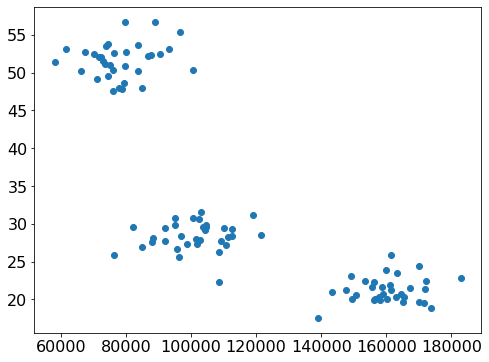

In [263]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1])
plt.show()



In [247]:
initial_centroids = initialize_cluster_centers(data, 3, seed=5)
centroids, cluster_assignment = kmeans(data, 3, initial_centroids, maxiter=400,record_heterogeneity=heterogeneity)


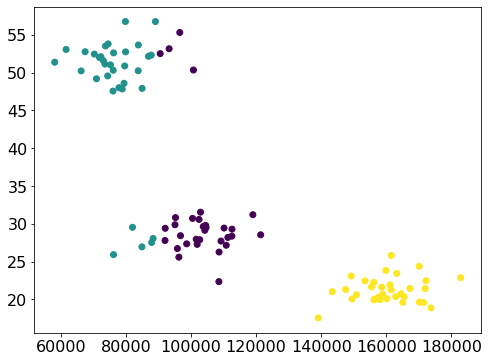

In [253]:

plt.scatter(data[:,0], data[:,1], c=cluster_assignment.astype(float))


# Let's compare with scikit-learn

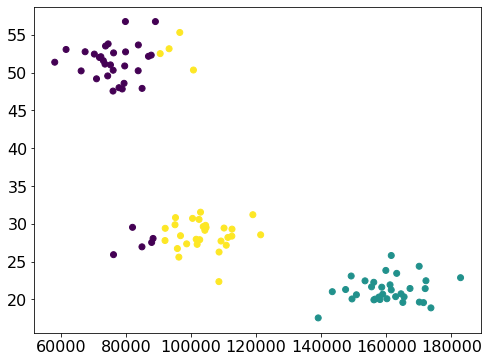

In [265]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model = model.fit(data)

plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()